# Anaemia Prediction
### Data: https://www.kaggle.com/datasets/humairmunir/anaemia-prediction
### Dataset Description:
This dataset is curated to facilitate the development of machine learning models aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images. Each row in the dataset corresponds to an individual case with various features

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [5]:
df = pd.read_csv('output.csv').drop(columns= ['Number'])
df


,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


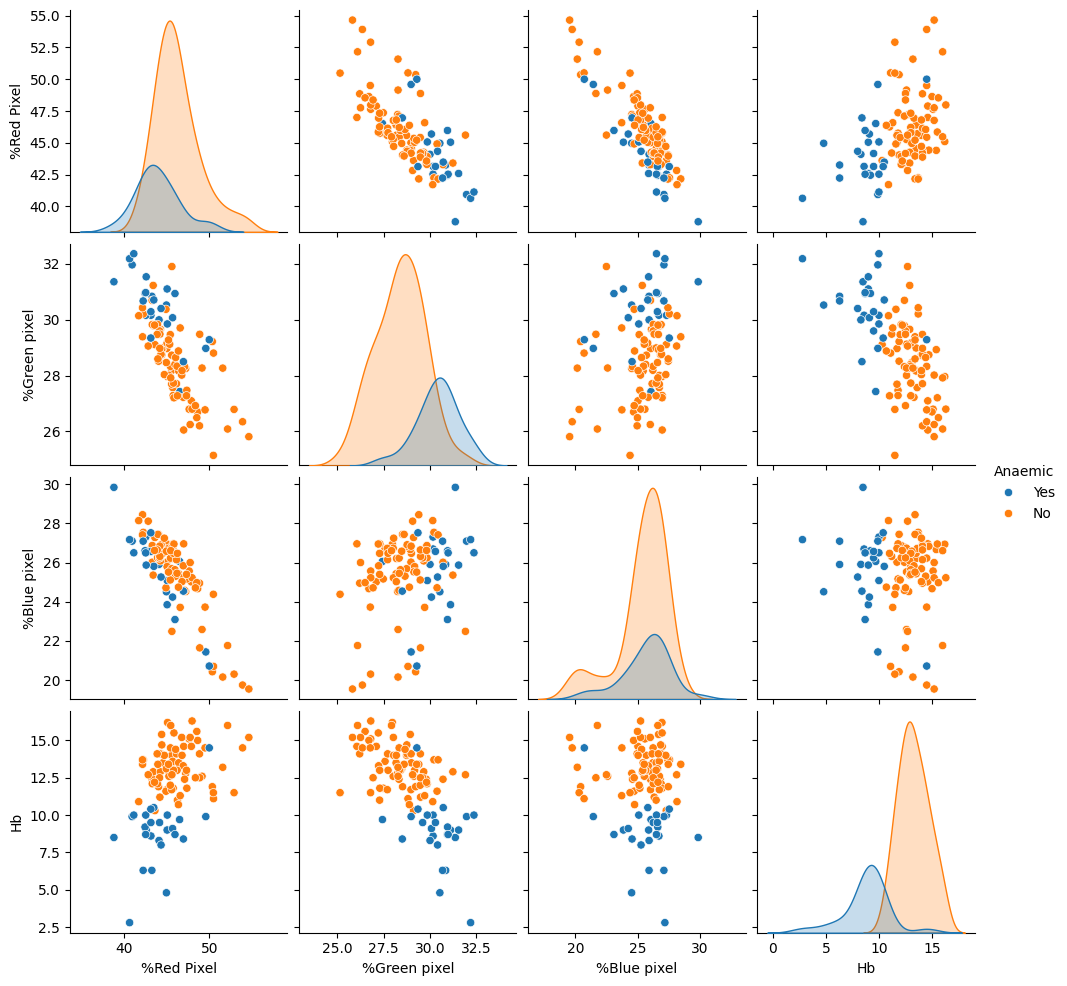

In [6]:
sns.pairplot(df, hue ='Anaemic')
# to show
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
labels = [0, 1]#df.Anaemic.unique()
def plot_confusion(y_test, y_pred, classes):
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=15, pad=20)
    plt.xlabel('Prediction', fontsize=11)
    plt.ylabel('Actual', fontsize=11)
    #Customizations
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top()
    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    
    plt.show()

In [8]:
df['Sex'] = df.Sex.apply(lambda x: x.strip())
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


## Test Train Split

In [9]:

cat = df.select_dtypes(include=['object']).columns
classes = dict()
le = LabelEncoder()
for col in cat:
    df[col]= le.fit_transform(df[col])
    classes[col] = le.classes_
classes

{'Sex': array(['F', 'M'], dtype=object),
 'Anaemic': array(['No', 'Yes'], dtype=object)}

In [10]:
X = df.drop(labels = ['Anaemic'], axis=1)
y = df.Anaemic

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42, stratify = y)
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

## Logistic Regression

In [12]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), 
      "penalty":["l1","l2", "elasticnet", None],
      'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
     }# l1 lasso l2 ridge
logreg= LogisticRegression()
logreg_cv= HalvingGridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.9833333333333332


accuracy = 0.9375


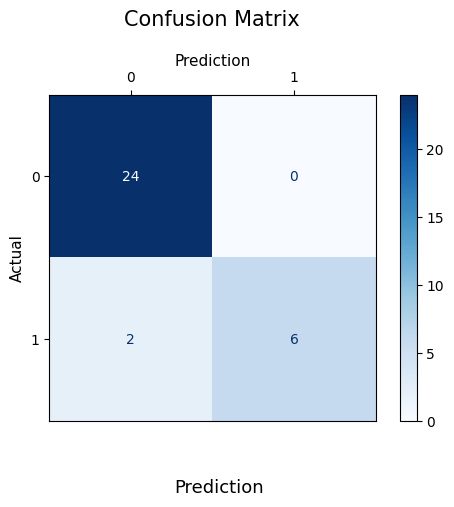

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.75      0.86         8

    accuracy                           0.94        32
   macro avg       0.96      0.88      0.91        32
weighted avg       0.94      0.94      0.93        32



In [13]:
lr = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 1000)#penalty = 'l2', solver = 'lbfgs', C = 1000
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
plot_confusion(y_test, y_pred, labels)
print(classification_report(y_test, y_pred))

In [14]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = lr.predict_proba(X_test)[:, 1]
y_probs

array([3.27724498e-14, 4.78497551e-30, 7.26147771e-26, 1.00000000e+00,
       1.22257389e-20, 2.25042304e-13, 6.74659674e-29, 7.48034258e-24,
       6.86777591e-30, 1.87509515e-23, 1.38250052e-30, 4.04523382e-09,
       1.00000000e+00, 1.61628171e-46, 3.53448095e-18, 2.57209124e-39,
       1.29819417e-14, 8.88655111e-32, 2.32694272e-21, 2.18489696e-28,
       1.00000000e+00, 8.92963597e-03, 1.00000000e+00, 3.49948467e-18,
       2.73139610e-24, 1.21427201e-17, 1.00000000e+00, 2.61159560e-43,
       1.00000000e+00, 3.55777634e-12, 3.68472194e-43, 4.00121648e-04])

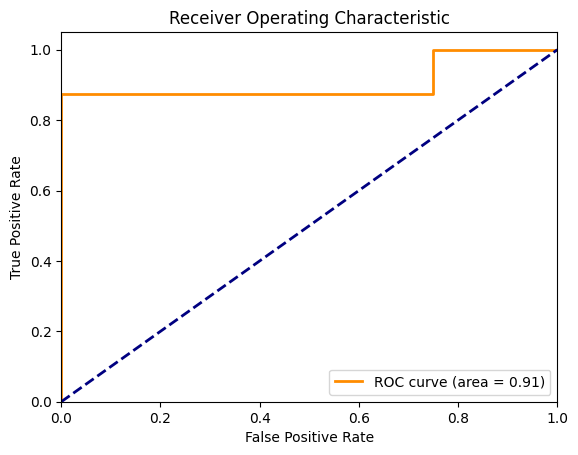

In [15]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [16]:
threshold = 0.5
y_pred_custom = (y_probs >= threshold).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.75      0.86         8

    accuracy                           0.94        32
   macro avg       0.96      0.88      0.91        32
weighted avg       0.94      0.94      0.93        32



## SVM

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':np.logspace(-3,3,7),
              'gamma':[1,0.1,0.001,0.0001, 'scale', 'auto'], 
              'kernel':['linear','rbf', 'poly', 'sigmoid'],
             }

svm_cv=GridSearchCV(SVC(),param_grid,cv=5)
svm_cv.fit(X_train,y_train)


print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'gamma': 'scale', 'kernel': 'poly'}
accuracy : 0.9733333333333334


accuracy = 0.96875


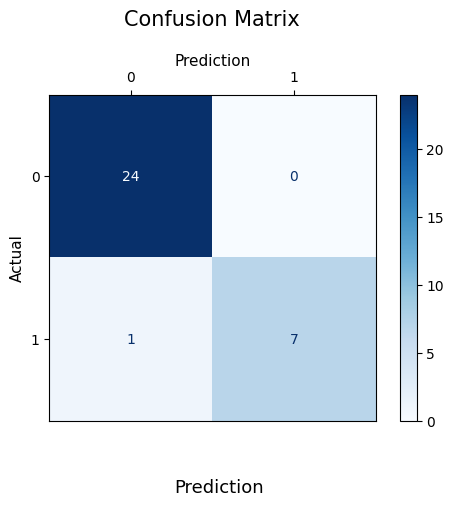

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.88      0.93         8

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32



In [ ]:
svm = SVC(C= 10.0, gamma= 'scale', kernel= 'poly',  probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
plot_confusion(y_test, y_pred, labels)
print(classification_report(y_test, y_pred))

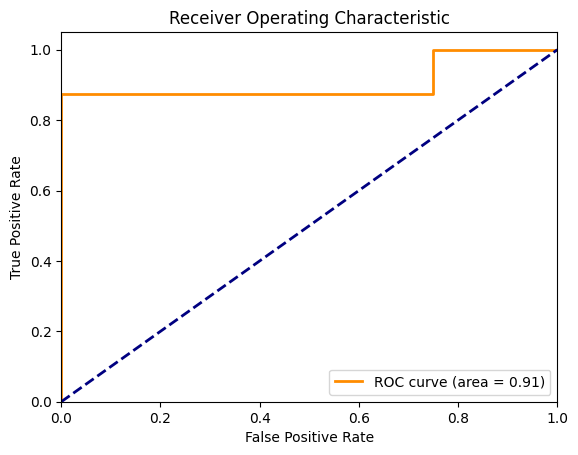

In [ ]:
# Predict probabilities
y_probs = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
threshold = 0.5
y_pred_custom = (y_probs >= threshold).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.88      0.93         8

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32



## Decision Tree

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}
accuracy : 0.9866666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_features= 'sqrt')
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_features='sqrt')

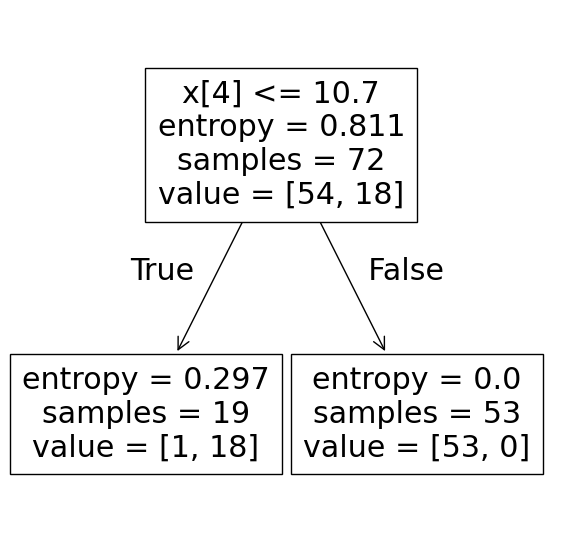

In [ ]:
from sklearn import tree
plt.figure(figsize=(7, 7))
tree.plot_tree(DT)
plt.show()

accuracy = 0.9375


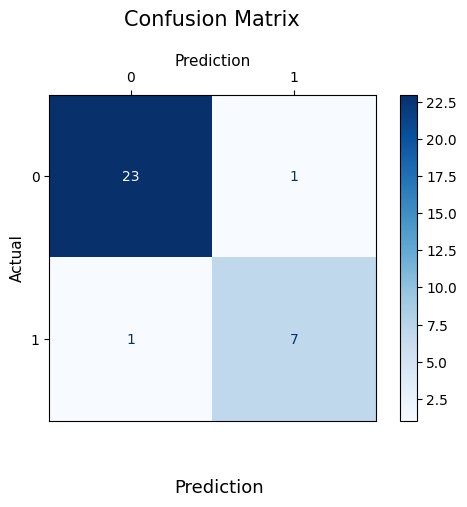

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.88      0.88      0.88         8

    accuracy                           0.94        32
   macro avg       0.92      0.92      0.92        32
weighted avg       0.94      0.94      0.94        32



In [ ]:
y_pred = DT.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
plot_confusion(y_test, y_pred, labels)
print(classification_report(y_test, y_pred))

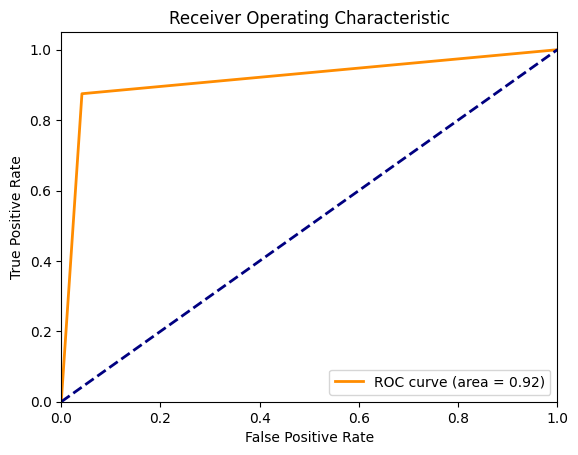

In [ ]:
# Predict probabilities
y_probs = DT.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
threshold = 0.5
y_pred_custom = (y_probs >= threshold).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.88      0.88      0.88         8

    accuracy                           0.94        32
   macro avg       0.92      0.92      0.92        32
weighted avg       0.94      0.94      0.94        32

